# Data Scientist Test 

แมนรัตน์ ผายผล (แมน) / Maenrat Phaiphon (Man) 

Email: phaiphon.m@gmail.com

Tel: 065-670-9043

### หมายเหตุ
เนื่องจากความเคยชินผผมขออนุญาติใช้คอมเม้นใน code เป็นภาษาอังกฤษ เพื่อให้ง่ายต่อการพิมพ์และสามารถใช้อธิบายทับศัพท์แทนไปได้ ในขณะที่โจทย์ไหนที่ต้องการคำอธิบายผมจะพิมพ์เป็นภาษาไทยไว้ครับ 

## Import lib

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Question 1: Data Wrangling 


#### No.1 Read CSV file with **Pandas** 

อ่านไฟล์ CSV ด้วย Pandas

In [16]:
#Read data using pandas
df = pd.read_csv('Q1 Data.csv')
df

,id,department,work_hours,performance_score
0,1,Ward,10.0,37
1,2,OPD,9.0,106
2,3,ER,9.0,1
3,4,Ward,10.0,37
4,5,Ward,10.0,26
...,...,...,...,...
995,996,ER,10.0,-7
996,997,ER,10.0,98
997,998,OPD,9.0,37
998,999,OPD,9.0,62


#### No.2 Replace missing(work_hours) using mean 
เติมค่า missing (ค่าว่างใน column) ใน work_hours โดยค่าเฉลี่ย 


In [17]:
#find missing value in data
df.isnull().sum()

id                    0
department            0
work_hours           98
performance_score     0
dtype: int64

In [18]:
#fill missing value in work_hors with mean
df['work_hours'].fillna(df['work_hours'].mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18876\659161910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_hours'].fillna(df['work_hours'].mean(), inplace=True)


In [19]:
#recheck for null value (expected 0 in work_hours)
df.isnull().sum()

id                   0
department           0
work_hours           0
performance_score    0
dtype: int64

#### No.3 Remove rows that showing "performance_score" out of 0-100 range
ลบแถวที่มี performance_socre นอกช่วง 0-100

In [20]:
#heading the performance_score that had more than 100 as example
df[df['performance_score'] > 100]

,id,department,work_hours,performance_score
1,2,OPD,9.000000,106
12,13,Ward,8.995565,112
17,18,OPD,10.000000,106
18,19,OPD,8.995565,113
28,29,OPD,8.000000,114
...,...,...,...,...
955,956,Ward,8.995565,118
958,959,ICU,8.000000,114
971,972,Ward,10.000000,107
974,975,OPD,9.000000,106


In [21]:
#counting the rows that had perm score more than 100
df[df['performance_score'] > 100].count()

id                   162
department           162
work_hours           162
performance_score    162
dtype: int64

In [22]:
#remove the rows that had perm score more than 100 
df = df[df['performance_score'] <= 100]

In [23]:
#recheck (should expected 0)
df[df['performance_score'] > 100].count()

id                   0
department           0
work_hours           0
performance_score    0
dtype: int64

#### No.4 Shows the summary of mean in work_hours group by department
แสดงสรุปค่าเฉลี่ย work_hours แยกตาม department

In [24]:
#showing the mean of work_hours group by department
df.groupby('department')['work_hours'].mean()

department
ER      8.986253
ICU     9.050804
OPD     9.012581
Ward    8.951750
Name: work_hours, dtype: float64

## Question 2: Machine Learning Mini Task 

In [49]:
#import lib 
from sklearn.linear_model import LogisticRegression
#train test
from sklearn.model_selection import train_test_split
#confusion matrix and scores
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

data = pd.read_csv('Q2 Data.csv')

In [30]:
#check for any missing value
data.isnull().sum()

age                 0
experience_years    0
training_hours      0
passed_exam         0
dtype: int64

In [32]:
#example of data
data.head()

,age,experience_years,training_hours,passed_exam
0,45,4,31,1
1,25,8,16,0
2,36,1,35,0
3,46,10,36,1
4,56,1,36,0


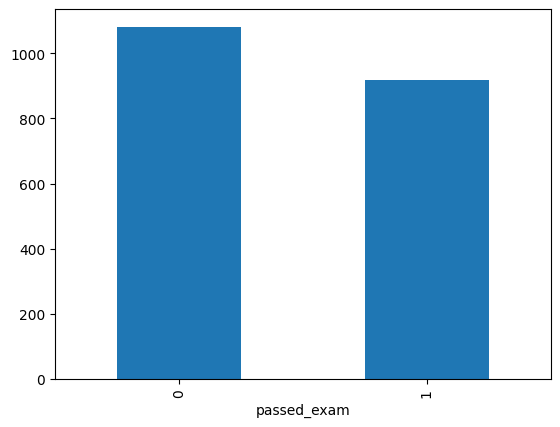

passed_exam
0    1082
1     918
Name: count, dtype: int64

In [36]:
#plot the target class
import matplotlib.pyplot as plt
tarcount = data['passed_exam'].value_counts()
data['passed_exam'].value_counts().plot(kind='bar')
plt.show()

tarcount

In [38]:
#split data into 80/20 format
X = data.drop('passed_exam', axis=1)
y = data['passed_exam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [ ]:
#train the logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
#evaluate the result
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       224
           1       0.80      0.83      0.82       176

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.84       400

[[188  36]
 [ 30 146]]


array([[188,  36],
       [ 30, 146]], dtype=int64)

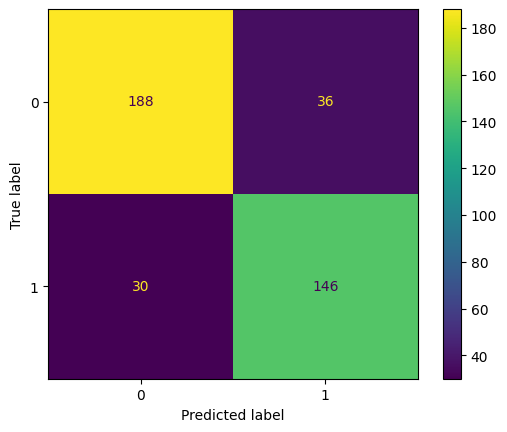

In [50]:
#plot the confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
cm

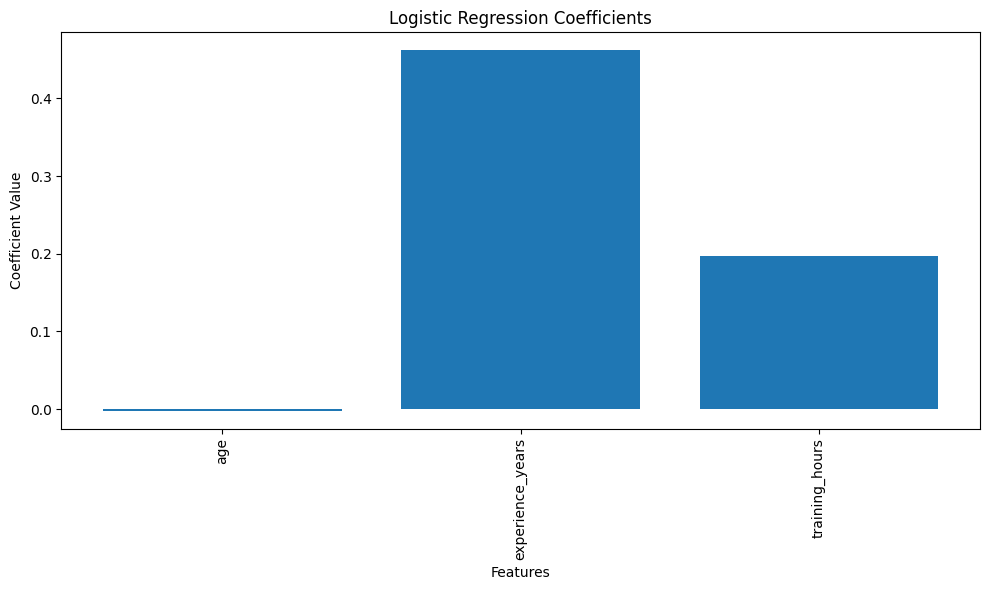

In [52]:
#COef
coef = lr.coef_[0] 

feature_names = X_train.columns

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(coef)), coef, tick_label=feature_names)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Logistic Regression Coefficients")
plt.tight_layout()
plt.show()

### วิเคราะห์ผลสั้นๆ

-   ในช่วงตรวจสอบข้อมูลในการตรวจ Target class (class ที่เป็นผลลัพธ์ของแต่ละ rows หรือในที่นี้คือ passed_exams) พบว่า 0 มีค่ามากกว่า 1 อยู่ที่ 164 จำนวน โดย 0 มี 1082 จำนวน และ 1 มี 918 จำนวน รวมเป็น 2000 samples โดยความต่างมีน้อยจึงไม่มีผลเรื่องปัญหา imbalanced มาก

-   logistic regression มีคะแนน Accuracy เฉลี่ยที่ 0.82 โดยขณะที่ Confusion matrix ให้ผลค่าติดลบ (negative prediction) อยู่ที่ 66 จากทั้งหมด 400 โดยโมเดลไม่เอนเอียง (bias) ไปหา class 0 หรือ 1 ทางไหนมากจนเกินไป ถึงอย่างไร class 0 ยังมีอัตราตอบที่ถูกมากกว่าที่อาจจะมาจากการที่จำนวนของ 0 มีมากกว่า 1 ดังที่กล่าวไปข้างต้น

-   ในการ plot Coef เพื่อหาความสัมพันธ์ของข้อมูลแต่ละ column กับ target class พบว่า age มีส่วนสำคัญน้อยมาก ใยขณะที่ expreince_years และ Training_hours จะมีความสำคัญอย่างมากในการทำนายผลของโมเดล นั่นหมายถึง หากมีข้อมูล 2 ชุดดังกล่าวมากขึ้น โมเดลจะสามารถจับทางและเรียนรู้ชุดข้อมูลได้ดีกว่า ในขณะที่ Age สามารถตัดทิ้งได้เลย โดยสรุปคือ expreince_years และ Trainning_hours มีความสัมพันธ์เชิงเส้นเป็นบวกกับ Targetclass


## Question 3: Logic & Problem Solving

สมมติว่ามีพนักงาน 4 คน ABCD จัดกะ 3 วัน (day 1-3)

-   1วัน ต้องมีคนทำงาน 2
-   คนเดิมห้ามทำงาน 3 วันติด

In [65]:
# employees
employees = ['a', 'b', 'c', 'd']

# create a pairs of employees for each days
pairs = []
n = len(employees)
for i in range(n):
    for j in range(i+1, n):
        pairs.append((employees[i], employees[j]))

# checking
print("Pairs:", pairs)

#all possible schedules
all_schedules = []
for p1 in pairs:           
    for p2 in pairs:        
        for p3 in pairs:    
            all_schedules.append((p1, p2, p3))


# filteronly  valid schedules
valid_schedules = []
for sched in all_schedules:
    day1, day2, day3 = sched
    # check if each person is assigned more than 2 days
    violates = False
    for person in employees:
        if (person in day1) and (person in day2) and (person in day3):
            violates = True
            break
    if not violates:
        valid_schedules.append(sched)


# data frame
df = pd.DataFrame(valid_schedules, columns=['Day 1', 'Day 2', 'Day 3'])

# function to calculate score of fairness
def schedule_score(row):
    counts = {e: 0 for e in employees}
    for day in (row['Day 1'], row['Day 2'], row['Day 3']):
        for e in day:
            counts[e] += 1
    # smaller diff between max and min = more fair
    return max(counts.values()) - min(counts.values())

df['Score'] = df.apply(schedule_score, axis=1)

# pick the best
best_2 = df.sort_values('Score').head(2).reset_index(drop=True)

# print
print("\nBest 2 schedules by Score:")
print(best_2)

# to csv
df.to_csv("valid_schedules.csv", index=False)
best_2.to_csv("best_schedules.csv", index=False)


Pairs: [('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

Best 2 schedules by Score:
    Day 1   Day 2   Day 3  Score
0  (a, b)  (a, b)  (c, d)      1
1  (b, d)  (a, c)  (a, c)      1


In [62]:
#example of unfair schedule (showing 5 samples)
df[df['Score'] == 2].sample(5)

,Day 1,Day 2,Day 3,Score
102,"(c, d)","(a, c)","(a, d)",2
19,"(a, c)","(a, b)","(b, c)",2
90,"(b, d)","(b, c)","(c, d)",2
94,"(b, d)","(c, d)","(b, c)",2
43,"(a, d)","(a, c)","(c, d)",2


### อธิบายการทำงาน

-   กฏบอกว่า ABCD ต้องทำงานไม่เกิน2วัน และ แต่ละวันต้องมีคนทำงาน 2 คน เป็นจำนวนสามวันติดกัน
-   code ทำงานโดยที่จับคู่พนักงานทั้งหมดจากนั้นให้จัดคู่ไปลงตารางทำงานในทุกวัน (โดยไม่สนกฏ)
-   โดยจะได้ ตารางงานที่ประกอบไปด้วยการจับคู่ทั้งหมดที่เป็นไปได้และจะนำผผลลัพธ์ตรงนั้นไปกรองเอาส่วนที่ผิดกฏออก โดยการตรวจหาว่าในตารางแต่ละช่อง มีตารางไหนหรือไม่ที่ให้พนักงานคนเดิมทำซ้ำเกิน 2 วัน หากตรวจพบเจอจะไม่เก็บตารางงานตรงนั้นไว้
-   ในการเลือกตารางงานที่ตรงตามกฏแต่เหมาะสมที่สุด จะเลือกโดยใช้ค่าความเอาเปรียบ (unfairness) นั่นหมายถึงหากยิ่งในค่าความเอาเปรียบต่ำแสดงว่าตารางงานมีความสมดุล

ตัวอย่างเช่นในกรณีตารางงานจัดออกมาเป็น 

(c, d)	(a, c)	(a, d)	

ค่าที่ได้จากฟังก์ชัน schedule_score จะออกมาเป็น 

[2,0,2,2] โดยแต่ละช่อง (เรียงจากซ้ายไปขวา) แทนที่ A B C D มีความหมายเป็นความถี่ของพนักงานที่ทำงานอยู่ทั้ง 3 วัน จะเห็นว่า A C D ทำงาน 2 วันทั้งหมด ในขณะที่ B ไม่ได้ทำงานเลย จะคำนวณค่าความเอาเปรียบได้ เป็น MAX - min = 2 - 0 = 2 นั่นเอง


โดยในขณะที่ตารางงานส่วนใหญ่จะมีคะแนนที่ 1 เนื่องจากกฏ นั่นหมายถึง ไม่ว่าจะจัดตารางงานยังไง ถ้าจะจัดให้เหมาะสมที่สุด พนักงานทุกคนต้องทำงานอย่างน้อย 1 วัน และ ต้องมี 1 คน ทำงาน 2 วัน 

โดย ตารางงานแบบ valid (ไม่ดูจากค่าเอาเปรียบ แต่ทำตามกฏ) จะ save เป็นไฟล์ ชื่อ valid_schedules.csv ในขณะที่ best_schedules.csv จะเก็บตารางงานแบบที่ดีที่สุด 2 อันแรก
